# **Setup**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Load the Data: COVID vs Pneumonia**

In [ ]:
# mv /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

In [ ]:
# !unzip -q /content/chest-xray-covid19-pneumonia.zip
# !ls

# **Set Directory Paths**

In [ ]:
# #set the path to the main dir
# import os
# main_dir = "/content/Data"

# #set the path to the train dir
# train_dir = os.path.join(main_dir, 'train') # make sure name is the same as the name in directory tree "train"

# #set the path to the test dir
# test_dir = os.path.join(main_dir, 'test')

# #directory with the training covid images
# train_covid_dir = os.path.join(train_dir, 'COVID19')

# #directory with the training normal images
# train_normal_dir = os.path.join(train_dir, 'NORMAL')

# #directory with the training pneumonia images
# train_pneum_dir = os.path.join(train_dir, 'PNEUMONIA')

# #directory with the testing covid images
# test_covid_dir = os.path.join(test_dir, 'COVID19')

# #directory with the testing normal images
# test_normal_dir = os.path.join(test_dir, 'NORMAL')

# #directory with the testing pneumonia images
# test_pneum_dir = os.path.join(test_dir, 'PNEUMONIA')

In [ ]:
# #print the filenames
# train_covid_names = os.listdir(train_covid_dir) # this is list of all images in covid19 training directory set
# print(train_covid_names[:5])

# train_normal_names = os.listdir(train_normal_dir)
# print(train_normal_names[:5])

# train_pneum_names = os.listdir(train_pneum_dir) 
# print(train_pneum_names[:5])


# test_covid_names = os.listdir(test_covid_dir) 
# print(test_covid_names[:5])

# test_normal_names = os.listdir(test_normal_dir) 
# print(test_normal_names[:5])

# test_pneum_names = os.listdir(test_pneum_dir) 
# print(test_pneum_names[:5])

In [ ]:
# #print the total no of images present in each dir
# print("Total images present in the training set :",len(train_covid_names+train_normal_names+train_pneum_names))
# print("Total images present in the testing set :",len(test_covid_names+test_normal_names+test_pneum_names))

# **Filter corrupted Images**

In [ ]:
# import os

# main_dir = "/content/Data"

# num_skipped = 0
# for folder_name in ("COVID19", "NORMAL", "PNEUMONIA"):
#     folder_path = os.path.join("PetImages", folder_name)
#     for fname in os.listdir(folder_path):
#         fpath = os.path.join(folder_path, fname)
#         try:
#             fobj = open(fpath, "rb")  # 'rb' stands for read, binary mode
#             is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
#         finally:
#             fobj.close()

#         if not is_jfif:
#             num_skipped += 1
#             # Delete corrupted image
#             os.remove(fpath)

# print("Deleted %d images" % num_skipped)

# **Generate a `Dataset`**

In [ ]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Data/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Data/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5144 files belonging to 3 classes.
Using 4116 files for training.
Found 5144 files belonging to 3 classes.
Using 1028 files for validation.


In [ ]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
class_names = train_ds.class_names
print(class_names)

['COVID19', 'NORMAL', 'PNEUMONIA']


# **Visualize the Data**

In [ ]:
# # plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
# import matplotlib.image as mpimg

# #set the number of columns and rows
# rows = 3
# cols = 3

# #set the figure size
# fig = plt.gcf()
# fig.set_size_inches(12,12)

# #get the filenames from the covid & normal dir of the train dataset
# covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:3]]
# normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:3]]
# pneumonia_pic = [os.path.join(train_pneum_dir, filename) for filename in train_pneum_names[0:3]]
# #print the list
# print(covid_pic)
# print(normal_pic)
# print(pneumonia_pic)

# #merge the covid and normal list
# merged_list = covid_pic+normal_pic+pneumonia_pic
# for i, img_path in enumerate(merged_list):
#   data = img_path.split('/',5)[5]
#   sp = plt.subplot(rows, cols, i+1)
#   sp.axis('Off')
#   img = mpimg.imread(img_path)
#   sp.set_title(data, fontsize=10)
#   plt.imshow(img, cmap='gray')

# plt.show()

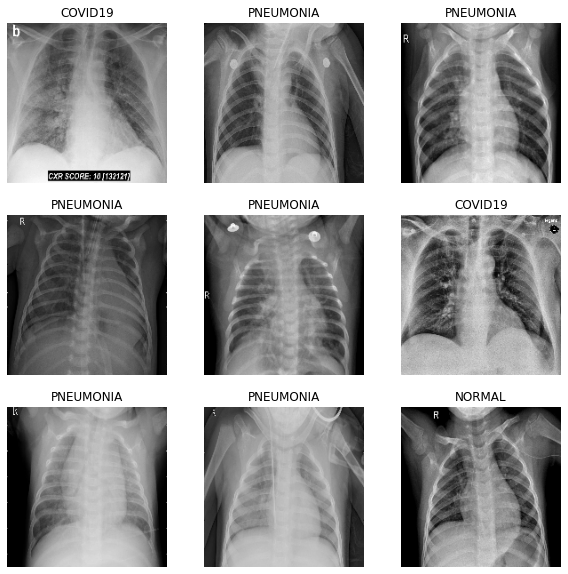

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# **Image Data Augmentation**

In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.05)
    ]
)

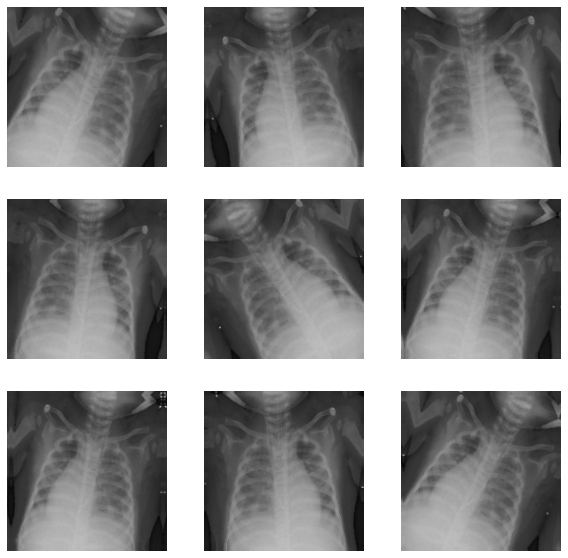

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## **Configure the dataset for performance**

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

# **Build Model**

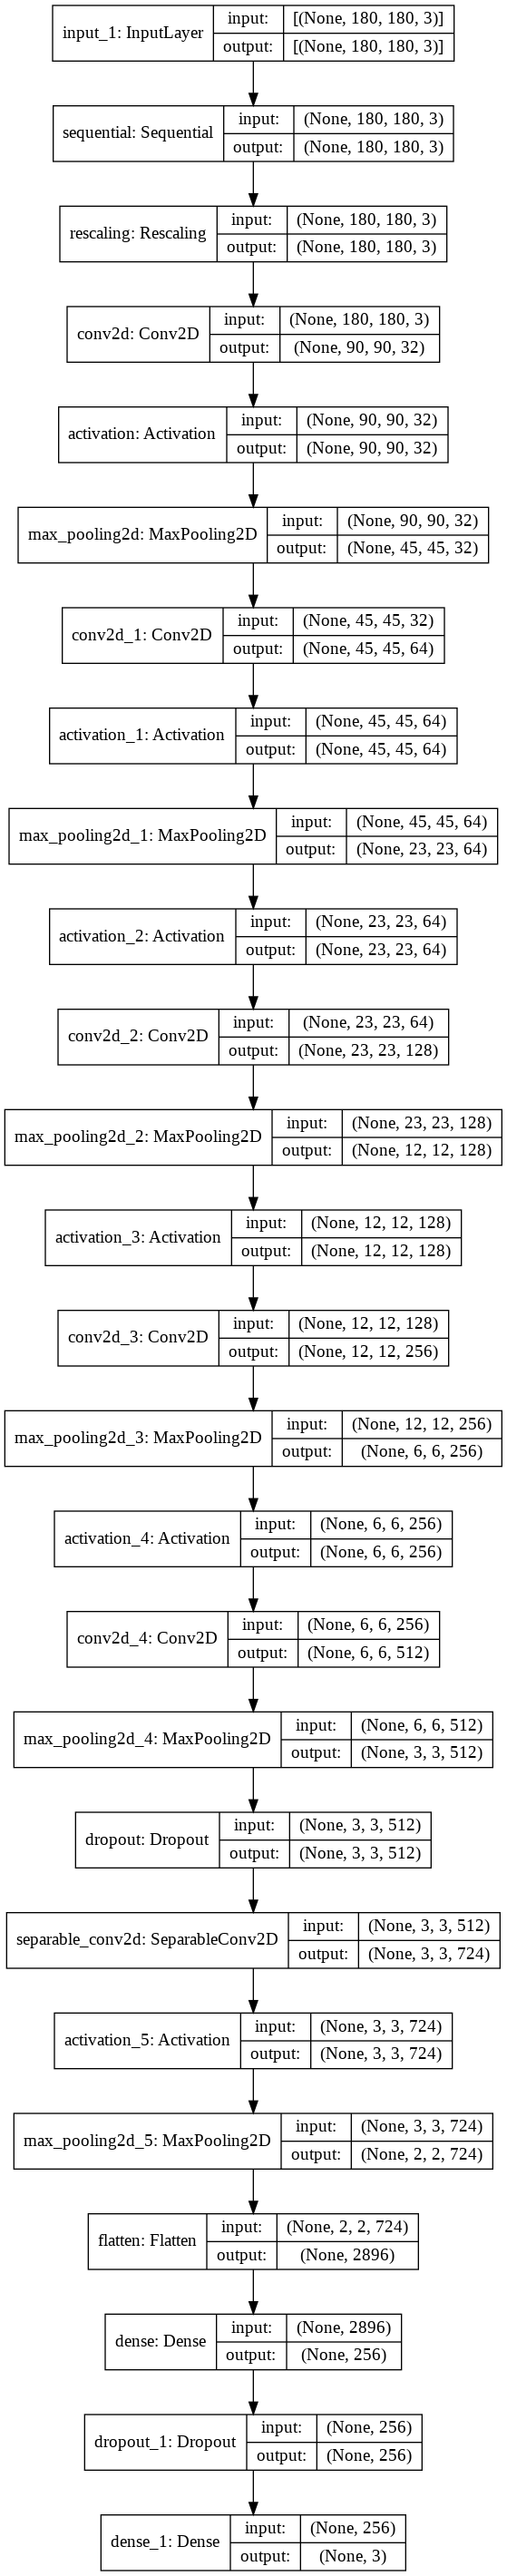

In [ ]:
keras.backend.clear_session()

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 5, strides=2, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D(3, strides=2, padding="same")(x)

    x = layers.Conv2D(64, 5, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D(3, strides=2, padding="same")(x)

    for size in [128, 256, 512]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2D(size, 5, padding="same")(x)
        x = layers.MaxPool2D(3, strides=2, padding="same")(x)

    x = layers.Dropout(0.5)(x)
    x = layers.SeparableConv2D(724, 3, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D(3, strides=2, padding="same")(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=3)
keras.utils.plot_model(model, show_shapes=True)

# **Train the Model**

In [ ]:
checkpoint_filepath = '/content/content'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    verbose=0,
    restore_best_weights = True)

def scheduler(epoch, lr):
  if epoch < 9:
    return lr
  else:
    return lr * tf.math.exp(-0.01)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
epochs = 50

model.compile(optimizer= keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"])

model.fit(
    train_ds, epochs = epochs, 
    callbacks = [model_checkpoint_callback, early_stop, lr_callback],
    validation_data = val_ds)

Epoch 1/50
129/129 [==============================] - 22s 158ms/step - loss: 0.8621 - accuracy: 0.6514 - val_loss: 0.7038 - val_accuracy: 0.6634
Epoch 2/50
129/129 [==============================] - 21s 157ms/step - loss: 0.6738 - accuracy: 0.6871 - val_loss: 0.5354 - val_accuracy: 0.7938
Epoch 3/50
129/129 [==============================] - 21s 157ms/step - loss: 0.4836 - accuracy: 0.8056 - val_loss: 0.3266 - val_accuracy: 0.8619
Epoch 4/50
129/129 [==============================] - 21s 157ms/step - loss: 0.3789 - accuracy: 0.8537 - val_loss: 0.2482 - val_accuracy: 0.8920
Epoch 5/50
129/129 [==============================] - 21s 156ms/step - loss: 0.3225 - accuracy: 0.8790 - val_loss: 0.2065 - val_accuracy: 0.9134
Epoch 6/50
129/129 [==============================] - 21s 156ms/step - loss: 0.2746 - accuracy: 0.9016 - val_loss: 0.2392 - val_accuracy: 0.9095
Epoch 7/50
129/129 [==============================] - 21s 157ms/step - loss: 0.2676 - accuracy: 0.9069 - val_loss: 0.2332 - val_ac

In [ ]:
# acc = model.history.history['accuracy']
# val_acc = model.history.history['val_accuracy']

# loss = model.history.history['loss']
# val_loss = model.history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

Text(0.5, 0, 'epoch')

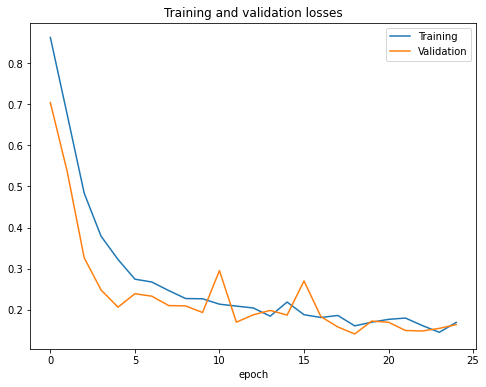

In [ ]:
#plot graph between training and validation loss
plt.figure(figsize=(8,6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

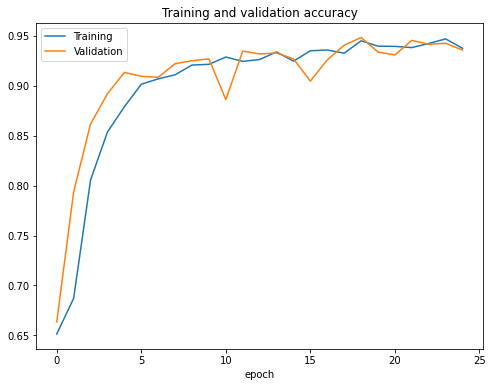

In [ ]:
#plot graph between training and validation loss
plt.figure(figsize=(8,6))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
tf.keras.models.save_model(
    model,
    "/content/drive/MyDrive/Projects/COVID_CNN/covid_pneum_model2",
    overwrite=True,
    include_optimizer=True,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/COVID_CNN/covid_pneum_model2/assets


In [ ]:
# restored_model = tf.keras.models.load_model(
#     "/content/drive/MyDrive/Projects/COVID_CNN/covid_pneum_model2", custom_objects=None, compile=True, options=None
# )

In [ ]:
image_path = "/content/Data/test/COVID19/COVID19(469).jpg"

img = keras.preprocessing.image.load_img(
    image_path, target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to COVID19 with a 57.60 percent confidence.


In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path, target_size=image_size)
  img_array = image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Saving COVID19(477).jpg to COVID19(477).jpg
Saving COVID19(478).jpg to COVID19(478).jpg
Saving NORMAL(1272).jpg to NORMAL(1272).jpg
Saving NORMAL(1320).jpg to NORMAL(1320).jpg
Saving PNEUMONIA(3426).jpg to PNEUMONIA(3426).jpg
Saving PNEUMONIA(3653).jpg to PNEUMONIA(3653).jpg
This image most likely belongs to COVID19 with a 46.76 percent confidence.
This image most likely belongs to COVID19 with a 42.05 percent confidence.
This image most likely belongs to NORMAL with a 57.60 percent confidence.
This image most likely belongs to NORMAL with a 53.94 percent confidence.
This image most likely belongs to PNEUMONIA with a 57.19 percent confidence.
This image most likely belongs to PNEUMONIA with a 57.59 percent confidence.
